In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from get_db_url import get_db_url

# Clustering Anomaly Detection Exercises

## 1

Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [8]:
# Load the grocery customers data
grocery = pd.read_sql('SELECT * FROM grocery_customers', get_db_url('grocery_db'), index_col = 'customer_id')
grocery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [9]:
grocery.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
# Let's look for anomalies in cold storage foods.
columns = [
    'Milk',
    'Frozen',
    'Delicassen'
]

refrigerated = grocery[columns]

In [16]:
# Splitting data? Who needs it?
scaler = MinMaxScaler()
refrigerated = pd.DataFrame(scaler.fit_transform(refrigerated), columns = refrigerated.columns)
refrigerated.head()

,Milk,Frozen,Delicassen
0,0.130727,0.003106,0.027847
1,0.132824,0.028548,0.036984
2,0.119181,0.039116,0.163559
3,0.015536,0.104842,0.037234
4,0.072914,0.063934,0.108093


In [17]:
# Now let's create the DBSCAN model
db_scan = DBSCAN(eps = 0.1, min_samples = 20)
db_scan.fit(refrigerated)

DBSCAN(eps=0.1, min_samples=20)

In [19]:
# Let's create a column for the cluster labels
grocery['labels'] = db_scan.labels_

/var/folders/95/v52kk6ys7s14hmmc3xm7b1xr0000gn/T/ipykernel_1560/2730259329.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1])


Text(0.5, 0, 'Grocery')

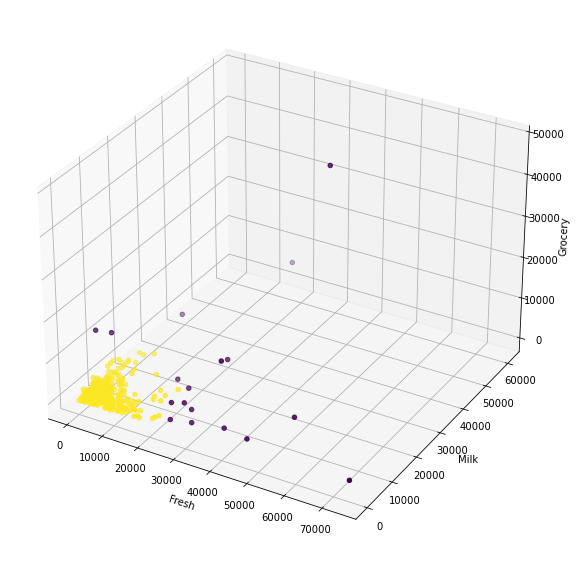

In [22]:
# Now let's plot the results

fig = plt.figure(figsize = (8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1])

ax.scatter(grocery.Milk, grocery.Frozen, grocery.Delicassen, c = grocery.labels)

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

## 2

Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [31]:
sql = '''
SELECT
    *
FROM logs;
'''

logs = pd.read_sql(sql, get_db_url('curriculum_logs'))
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   time       900223 non-null  object 
 2   path       900222 non-null  object 
 3   user_id    900223 non-null  int64  
 4   cohort_id  847330 non-null  float64
 5   ip         900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB
